<a href="https://colab.research.google.com/github/anudevi15/Sentiment-Analysis/blob/main/TwitterSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tweepy
# Replace with your bearer token
bearer_token = "AAAAAAAAAAAAAAAAAAAAAPMNDAEAAAAA%2BR%2FTgBs7wv1vv1zgdXmtNdL%2FQHM%3DqAPAFQFGRlHMSOpVhfxlYNnKyUS8YWawjqvZgKLW4dcdqWKEUR"

client = tweepy.Client(bearer_token=bearer_token)

In [18]:
import time

query = "thruxton 400 -is:retweet lang:en"  # Example: search for thruxton 400

# Fetch tweets in smaller batches with a delay to avoid rate limits
all_tweet_texts = []
next_token = None
num_tweets_to_fetch = 5# Total number of tweets to fetch
tweets_per_request = 1 # Number of tweets to fetch in each request

while len(all_tweet_texts) < num_tweets_to_fetch:
    try:
        tweets = client.search_recent_tweets(
            query=query,
            max_results=tweets_per_request,
            tweet_fields=['text', 'author_id'],
            expansions='author_id',
            user_fields=['username'],
            next_token=next_token
        )

        if tweets.data:
            all_tweet_texts.extend([tweet.text for tweet in tweets.data])
            next_token = tweets.meta.get('next_token')
            print(f"Fetched {len(tweets.data)} tweets. Total fetched: {len(all_tweet_texts)}")
        else:
            print("No more tweets found for this query.")
            break

        if next_token and len(all_tweet_texts) < num_tweets_to_fetch:
            time.sleep(2)  # Add a delay between requests to avoid rate limits

    except tweepy.TooManyRequests as e:
        print(f"Rate limit exceeded. Waiting before retrying... Error: {e}")
        time.sleep(60) # Wait for a longer period if rate limited
    except Exception as e:
        print(f"An error occurred: {e}")
        break

tweet_texts = all_tweet_texts[:num_tweets_to_fetch] # Use only the desired number of tweets

if tweet_texts:
    print(f"Number of tweets retrieved for analysis: {len(tweet_texts)}")
else:
    print("No tweets found.")

Rate limit exceeded. Waiting before retrying... Error: 429 Too Many Requests
Too Many Requests


KeyboardInterrupt: 

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

results = []

for tweet in tweet_texts:
    sentiment = analyzer.polarity_scores(tweet)
    sentiment_type = (
        "Positive" if sentiment["compound"] > 0.05 else
        "Negative" if sentiment["compound"] < -0.05 else
        "Neutral"
    )
    results.append({
        "tweet": tweet,
        "compound": sentiment["compound"],
        "sentiment": sentiment_type
    })

df = pd.DataFrame(results)
df.to_excel("bike_sentiment.xlsx", index=False)


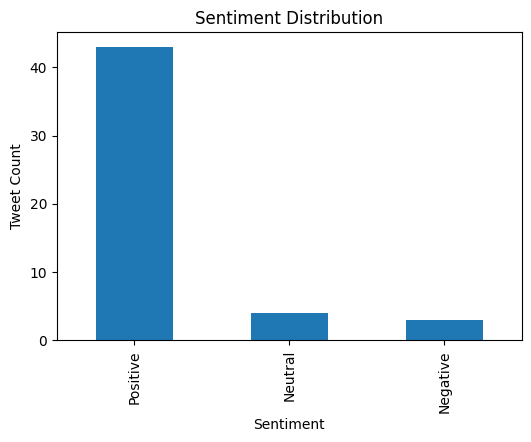

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


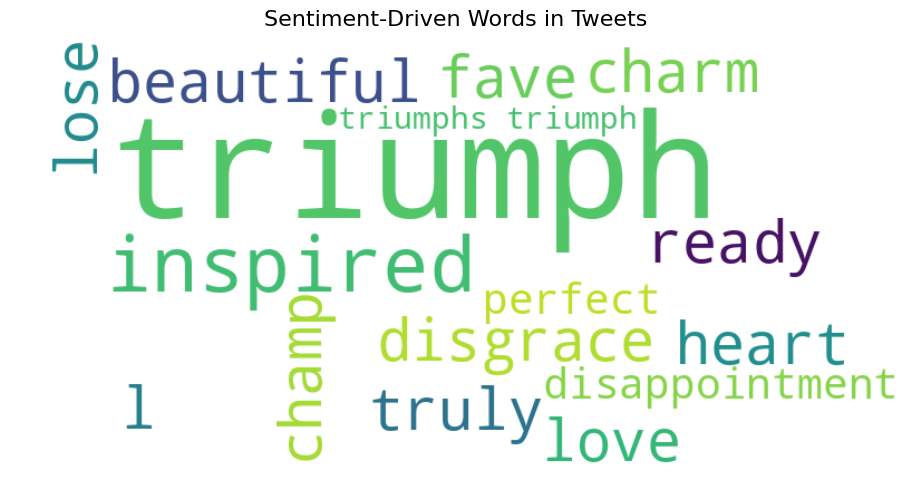

In [23]:
from wordcloud import WordCloud
import re
sentiment_words = []
# Iterate through each tweet in the list
for tweet in tweet_texts:
  clean_text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", "", tweet).lower()
  words = clean_text.split()
  # Add only sentiment-relevant words
  for word in words:
    score = analyzer.polarity_scores(word)["compound"]
    if abs(score) > 0.3:  # threshold to include only strong words
          sentiment_words.append(word)
  word_string = " ".join(sentiment_words)

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(word_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Sentiment-Driven Words in Tweets", fontsize=16)
plt.tight_layout()
plt.show()